In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# read CSV file
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
# we have categorical variables we may required to do one hot encoding/ LabelEncoding
# we also have null values in some columns
# size column has BHK and Bedrooms

In [5]:
# lets find null values in the given data frame
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
# lets remove unwanted columns from the data set
df2 = df1.drop(['society', 'availability'], axis=1)
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
# lets convert size into BHK
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
# lets make Bedroom as BHK
df2['size'] = df2['size'].apply(lambda x: int(x.split(" ")[0]) if  x is not np.NaN and ('Bedroom' in x or 'BHK' in x or 'RK' in x) else  int(x) if x is not np.NaN else x)
df2['size'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [9]:
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2.0,1200,2.0,1.0,51.00


In [10]:
df3 = df2.drop(['balcony'], axis=1)
df3.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3.shape

(13320, 6)

In [12]:
df3.dropna(inplace=True)
df3.shape

(13246, 6)

In [13]:
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df4 = pd.get_dummies(df3, columns=['area_type'])
df4.head()

,location,size,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Electronic City Phase II,2.0,1056,2.0,39.07,0,0,0,1
1,Chikka Tirupathi,4.0,2600,5.0,120.00,0,0,1,0
2,Uttarahalli,3.0,1440,2.0,62.00,1,0,0,0
3,Lingadheeranahalli,3.0,1521,3.0,95.00,0,0,0,1
4,Kothanur,2.0,1200,2.0,51.00,0,0,0,1


In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   location                        13246 non-null  object 
 1   size                            13246 non-null  float64
 2   total_sqft                      13246 non-null  object 
 3   bath                            13246 non-null  float64
 4   price                           13246 non-null  float64
 5   area_type_Built-up  Area        13246 non-null  uint8  
 6   area_type_Carpet  Area          13246 non-null  uint8  
 7   area_type_Plot  Area            13246 non-null  uint8  
 8   area_type_Super built-up  Area  13246 non-null  uint8  
dtypes: float64(3), object(2), uint8(4)
memory usage: 672.6+ KB


In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df5 = df4[~df4['total_sqft'].apply(is_float)]
df5

,location,size,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
30,Yelahanka,4.0,2100 - 2850,4.0,186.000,0,0,0,1
122,Hebbal,4.0,3067 - 8156,4.0,477.000,0,0,0,1
137,8th Phase JP Nagar,2.0,1042 - 1105,2.0,54.005,0,0,0,1
165,Sarjapur,2.0,1145 - 1340,2.0,43.490,0,0,0,1
188,KR Puram,2.0,1015 - 1540,2.0,56.800,0,0,0,1
...,...,...,...,...,...,...,...,...,...
12975,Whitefield,2.0,850 - 1060,2.0,38.190,0,0,0,1
12990,Talaghattapura,3.0,1804 - 2273,3.0,122.000,0,0,0,1
13059,Harlur,2.0,1200 - 1470,2.0,72.760,0,0,0,1
13265,Hoodi,2.0,1133 - 1384,2.0,59.135,0,0,0,1


In [20]:
df4 = df4[df4['total_sqft'].apply(is_float)]
df4.shape

(13056, 9)

In [21]:
# total _sqft is an object type lets convert it
def takingMean(sqft):
    try:
        if 'Sq.' in sqft:
            sqftList = float(sqft.split("Sq.")[0]) * 10.764
        elif 'Acres' in sqft:
            sqftList = sqft.split("Acres")
            sqftList = float(sqftList[0]) * 43560
        elif 'Cents' in sqft:
            sqftList = sqft.split("Cents")
            sqftList = float(sqftList[0]) * 435.6
        elif 'Perch' in sqft:
            sqftList = sqft.split("Perch")
            sqftList = float(sqftList[0]) * 272.25
        elif 'Guntha' in sqft:
            sqftList = sqft.split("Guntha")
            sqftList = float(sqftList[0]) * 1,088.98
        elif 'Grounds' in sqft:
            sqftList = sqft.split("Grounds")
            sqftList = float(sqftList[0]) * 2400
        else:
            sqftList = sqft.split(" - ")
            sqftList = float(sqftList[0]) + float(sqftList[1])
            sqftList = sqftList / 2
    except Exception as exc:
        print("Exception: "+ str(exc))
        return sqftList[0]
    return sqftList

In [22]:
df5['total_sqft'] = df5['total_sqft'].apply(takingMean)
df5.head()

,location,size,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
30,Yelahanka,4.0,2475,4.0,186.000,0,0,0,1
122,Hebbal,4.0,5611.5,4.0,477.000,0,0,0,1
137,8th Phase JP Nagar,2.0,1073.5,2.0,54.005,0,0,0,1
165,Sarjapur,2.0,1242.5,2.0,43.490,0,0,0,1
188,KR Puram,2.0,1277.5,2.0,56.800,0,0,0,1


In [23]:
df5 = df5.append(df4, ignore_index=True)
df5.shape

(13246, 9)

In [24]:
df5 = df5[df5['total_sqft'].apply(is_float)]
df5.shape

(13244, 9)

In [25]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13244 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   location                        13244 non-null  object 
 1   size                            13244 non-null  float64
 2   total_sqft                      13244 non-null  object 
 3   bath                            13244 non-null  float64
 4   price                           13244 non-null  float64
 5   area_type_Built-up  Area        13244 non-null  uint8  
 6   area_type_Carpet  Area          13244 non-null  uint8  
 7   area_type_Plot  Area            13244 non-null  uint8  
 8   area_type_Super built-up  Area  13244 non-null  uint8  
dtypes: float64(3), object(2), uint8(4)
memory usage: 672.5+ KB


In [26]:
df5['total_sqft'] = df5['total_sqft'].astype('float64')

In [27]:
# we have total sqft lets make price per sq feet
# price is in lakhs and total_sqft
df5['price_per_sq_feet'] = (df5['price'] * 100000)/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,price_per_sq_feet
0,Yelahanka,4.0,2475.0,4.0,186.000,0,0,0,1,7515.151515
1,Hebbal,4.0,5611.5,4.0,477.000,0,0,0,1,8500.400962
2,8th Phase JP Nagar,2.0,1073.5,2.0,54.005,0,0,0,1,5030.740568
3,Sarjapur,2.0,1242.5,2.0,43.490,0,0,0,1,3500.201207
4,KR Puram,2.0,1277.5,2.0,56.800,0,0,0,1,4446.183953


In [ ]:
# lets check for outliers in the data set
df5['price_per_sq_feet'] = df5['price_per_sq_feet'].apply(lambda x: format(x, 'f'))

In [28]:
df5 = df5[df5['price_per_sq_feet'] < (np.std(df5['price_per_sq_feet'])/6)]
df5.price_per_sq_feet.describe().apply(lambda x: format(x, 'f'))

count    12836.000000
mean      6153.990114
std       2925.507022
min          2.257423
25%       4227.866451
50%       5337.467017
75%       7043.354460
max      17741.935484
Name: price_per_sq_feet, dtype: object

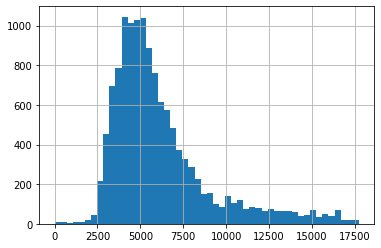

In [31]:
df5['price_per_sq_feet'].hist(bins=50)

In [30]:
df5.shape

(12836, 10)

In [36]:
df5 = df5[(df5['price_per_sq_feet']> np.mean(df5['price_per_sq_feet']) - np.std(df5['price_per_sq_feet'])) & (df5['price_per_sq_feet']<= np.mean(df5['price_per_sq_feet']) + np.std(df5['price_per_sq_feet']))]
df5.head()

,location,size,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,price_per_sq_feet
0,Yelahanka,4.0,2475.0,4.0,186.000,0,0,0,1,7515.151515
1,Hebbal,4.0,5611.5,4.0,477.000,0,0,0,1,8500.400962
2,8th Phase JP Nagar,2.0,1073.5,2.0,54.005,0,0,0,1,5030.740568
3,Sarjapur,2.0,1242.5,2.0,43.490,0,0,0,1,3500.201207
4,KR Puram,2.0,1277.5,2.0,56.800,0,0,0,1,4446.183953


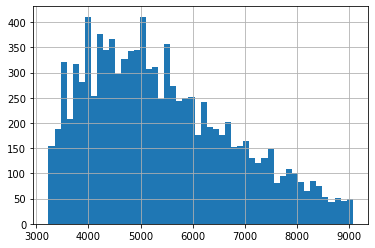

In [37]:
df5['price_per_sq_feet'].hist(bins=50)

In [52]:
df6 = df5.copy()

In [65]:
otherLocation = df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
otherLocation

location
Whitefield                       456
Sarjapur  Road                   352
Kanakpura Road                   260
Thanisandra                      227
Electronic City                  210
                                ... 
Koramangala Industrial Layout      1
Kothnoor Dinne                     1
Krishna Reddy Layout               1
Kudlu Village,                     1
 Anekal                            1
Name: location, Length: 1052, dtype: int64

In [68]:
otherLocationValues = otherLocation[otherLocation <15]

In [69]:
df6['location'] = df6['location'].apply(lambda x: 'others' if x in otherLocationValues else x)
df6

,location,size,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,price_per_sq_feet
0,Yelahanka,4.0,2475.0,4.0,186.000,0,0,0,1,7515.151515
1,Hebbal,4.0,5611.5,4.0,477.000,0,0,0,1,8500.400962
2,8th Phase JP Nagar,2.0,1073.5,2.0,54.005,0,0,0,1,5030.740568
3,Sarjapur,2.0,1242.5,2.0,43.490,0,0,0,1,3500.201207
4,KR Puram,2.0,1277.5,2.0,56.800,0,0,0,1,4446.183953
...,...,...,...,...,...,...,...,...,...,...
13238,Bellandur,2.0,1262.0,2.0,47.000,0,0,0,1,3724.247227
13239,Uttarahalli,3.0,1345.0,2.0,57.000,0,0,0,1,4237.918216
13240,Green Glen Layout,3.0,1715.0,3.0,112.000,0,0,0,1,6530.612245
13241,Whitefield,5.0,3453.0,4.0,231.000,1,0,0,0,6689.834926


In [70]:
df6.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
others                2869
Whitefield             456
Sarjapur  Road         352
Kanakpura Road         260
Thanisandra            227
                      ... 
Bannerghatta            16
6th Phase JP Nagar      16
Parappana Agrahara      16
Domlur                  15
Arekere                 15
Name: location, Length: 144, dtype: int64

In [71]:
def scatterPlotForLocation(df, Location):
    bhk2 = df[(df['location'] == Location) & (df['size'] == 2.0)]
    bhk3 = df[(df['location'] == Location) & (df['size'] == 3.0)]
    plt.figure(figsize=(15, 15))
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='Blue', label='2BHK', s=30)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker='+', color='Green', label='2BHK', s=30)
    plt.xlabel("Total Sq feet area")
    plt.ylabel("price per Sq feet area")
    plt.title(Location)
    plt.legend()

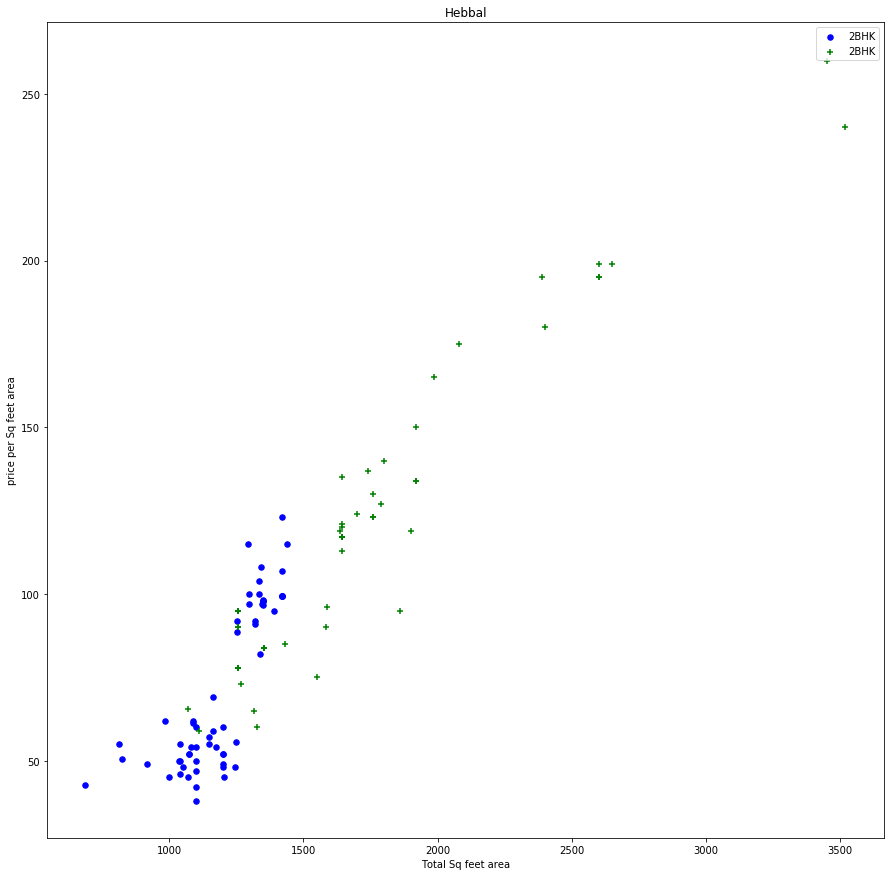

In [73]:
scatterPlotForLocation(df6, 'Hebbal')

In [74]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sq_feet),
                'std' : np.std(bhk_df.price_per_sq_feet),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sq_feet']<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [75]:
df7 = remove_bhk_outlier(df6)
df7.shape

(6897, 10)

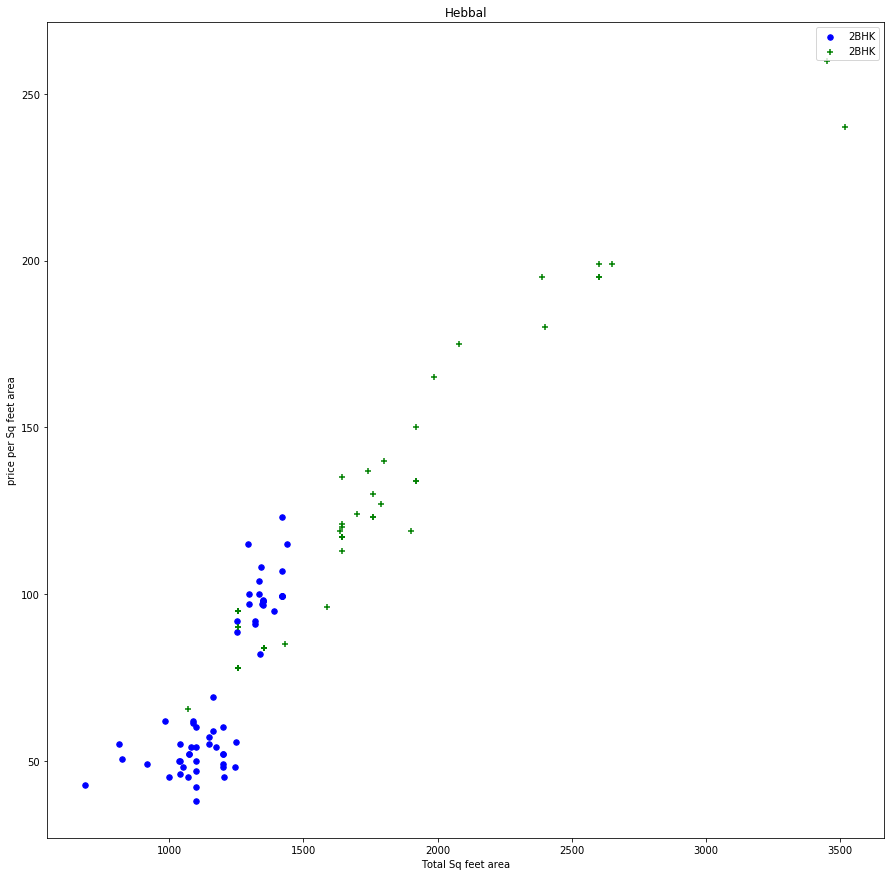

In [77]:
scatterPlotForLocation(df7, 'Hebbal')

In [78]:
df7.head()

,location,size,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,price_per_sq_feet
0,Yelahanka,4.0,2475.0,4.0,186.000,0,0,0,1,7515.151515
1,Hebbal,4.0,5611.5,4.0,477.000,0,0,0,1,8500.400962
2,8th Phase JP Nagar,2.0,1073.5,2.0,54.005,0,0,0,1,5030.740568
3,Sarjapur,2.0,1242.5,2.0,43.490,0,0,0,1,3500.201207
4,KR Puram,2.0,1277.5,2.0,56.800,0,0,0,1,4446.183953


In [83]:
df7 = df7[df7['size'] < df7['bath']+2]
df7.shape

(6851, 10)

In [84]:
df7.columns.tolist()

['location',
 'size',
 'total_sqft',
 'bath',
 'price',
 'area_type_Built-up  Area',
 'area_type_Carpet  Area',
 'area_type_Plot  Area',
 'area_type_Super built-up  Area',
 'price_per_sq_feet']

In [85]:
df7.drop(['area_type_Built-up  Area',
 'area_type_Carpet  Area',
 'area_type_Plot  Area',
 'area_type_Super built-up  Area'], axis=1, inplace=True)

C:\Users\pvalluru\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [87]:
df7.drop(['price_per_sq_feet'], inplace=True, axis=1)

C:\Users\pvalluru\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [88]:
df7.head()

,location,size,total_sqft,bath,price
0,Yelahanka,4.0,2475.0,4.0,186.000
1,Hebbal,4.0,5611.5,4.0,477.000
2,8th Phase JP Nagar,2.0,1073.5,2.0,54.005
3,Sarjapur,2.0,1242.5,2.0,43.490
4,KR Puram,2.0,1277.5,2.0,56.800


In [91]:
df8 = pd.get_dummies(df7, columns=['location'])
df8

,size,total_sqft,bath,price,location_1st Phase JP Nagar,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,...,location_Uttarahalli,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_others
0,4.0,2475.0,4.0,186.000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4.0,5611.5,4.0,477.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1073.5,2.0,54.005,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1242.5,2.0,43.490,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1277.5,2.0,56.800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13236,2.0,1050.0,2.0,52.710,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13238,2.0,1262.0,2.0,47.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13239,3.0,1345.0,2.0,57.000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13240,3.0,1715.0,3.0,112.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df8.drop(['location_others'], axis=1, inplace=True)

In [94]:
X = df8.drop(['price'], axis=1)

In [95]:
Y = df8.price

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [97]:
linearReg = LinearRegression()
linearReg.fit(X_train, Y_train)
linearReg.score(X_test, Y_test)

0.9342782316399029

In [98]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(linearReg, X, Y, cv=cv)

array([0.90443764, 0.90971392, 0.90334251, 0.87926671, 0.94384954])